In [1]:
# From here: https://stackoverflow.com/questions/49264194/import-py-file-in-another-directory-in-jupyter-notebook
import sys
import os

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)


In [2]:
import numpy as np
import copy

import src.utils as utils
from src.nqs import RBM, IsingHamiltonian, IsingHamiltonianReduced
from config_parser import get_config_file

import matplotlib.pyplot as plt
%matplotlib inline


In [28]:
visible_size = 10
hidden_size = 32
seed = 44  # Seed for random number generator
walker_steps = 1000
gradient_steps = 100


In [29]:
np.random.seed(seed)

gamma = utils.random_gamma(visible_size)
ih = IsingHamiltonian(gamma=gamma)
ihr = IsingHamiltonianReduced(gamma=gamma[:len(gamma)])


In [23]:
print(gamma)
print(ihr)
print(ih)

[-0.75061472  1.31635732  1.24614003 -1.60491574]
IsingHamiltonianReduced
([-0.75061472  1.31635732  1.24614003 -1.60491574])
IsingHamiltonian
([[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.         -1.60491574 ...  0.          0.
   0.        ]
 [ 0.         -1.60491574  0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.         -1.60491574
   0.        ]
 [ 0.          0.          0.         ... -1.60491574  0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]])


In [30]:
eig,_ = np.linalg.eigh(ih)
I_truth = np.min(eig)
print(f"E_truth: {I_truth}")


E_truth: -10.099935813026084


In [31]:
ising_reduced_rbm = RBM(visible_size=visible_size, hidden_size=hidden_size, hamiltonian=ihr, walker_steps=walker_steps)
ir_energy_list = [it for it in ising_reduced_rbm.train(iterations=gradient_steps, lr=0.01)]

Current ground state: -0.0015411527907557706 for training step 0
Current ground state: -0.0014900268053378803 for training step 1
Current ground state: -0.001346066389251918 for training step 2
Current ground state: -0.001227020436422095 for training step 3
Current ground state: -0.0011435868317674748 for training step 4
Current ground state: -0.0009989137066864259 for training step 5
Current ground state: -0.0010195451975176849 for training step 6
Current ground state: -0.0010075384450443825 for training step 7
Current ground state: 0.0003682452292082228 for training step 8
Current ground state: -0.000991668959008285 for training step 9
Current ground state: -0.0006516329146163604 for training step 10
Current ground state: -0.0009822932459836388 for training step 11
Current ground state: -0.0009791087397435362 for training step 12
Training interrupted by user
func:train args:[(<src.nqs.RBM object at 0x000002A615002820>,), {'iterations': 100, 'lr': 0.01}] took: 174.66670107841492 sec


In [33]:
ising_rbm = RBM(visible_size=visible_size, hidden_size=hidden_size, hamiltonian=ih, walker_steps=1000)
i_energy_list = [it for it in ising_rbm.train(iterations=gradient_steps, lr=0.01)]

Current ground state: -0.0644870741228424 for training step 0
Current ground state: -0.03937703500562111 for training step 1
Current ground state: -0.217275585032856 for training step 2
Current ground state: -0.03744387382373357 for training step 3
Current ground state: -0.024675705000868648 for training step 4
Current ground state: -0.012336857698313239 for training step 5
Current ground state: -0.00916244102548579 for training step 6
Current ground state: -0.007274771284996311 for training step 7
Current ground state: -0.002231326954894801 for training step 8
Current ground state: -0.0013151640001886446 for training step 9
Current ground state: -0.004204025184427954 for training step 10
Current ground state: -0.00037255087657933763 for training step 11
Current ground state: -0.00581524527430143 for training step 12
Current ground state: 3.0053829362653737e-05 for training step 13
Current ground state: 0.00013852963408335535 for training step 14
Current ground state: 0.000212241336566

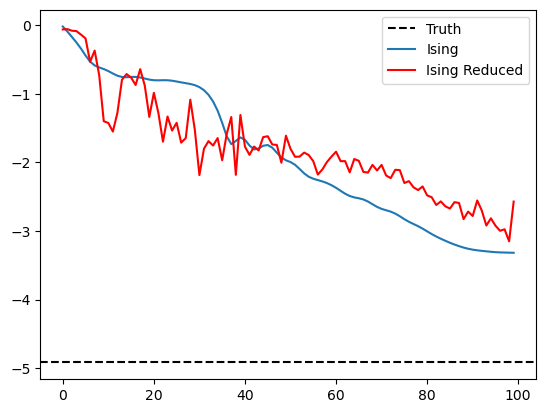

In [27]:
plt.axhline(y=I_truth, color='k', linestyle='--')
plt.plot(i_energy_list)
plt.plot(ir_energy_list, 'r')

plt.legend(['Truth', 'Ising', 'Ising Reduced'])

plt.show()

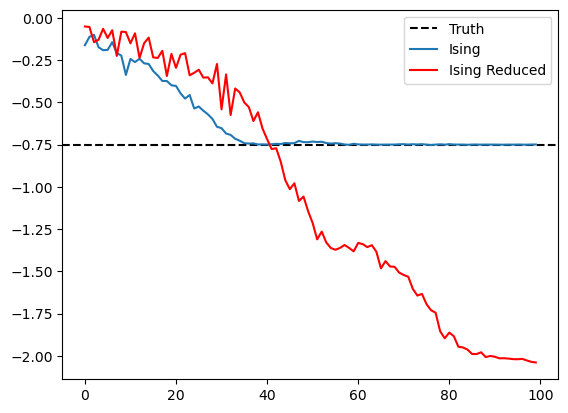

In [8]:
plt.axhline(y=I_truth, color='k', linestyle='--')
plt.plot(i_energy_list)
plt.plot(ir_energy_list, 'r')

plt.legend(['Truth', 'Ising', 'Ising Reduced'])

plt.show()